For writing the narrative and exporting data.

In [1]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

S_TOTALS = pickle.load(open('../data/S_Sex_Graduates.p', 'rb'))
E_TOTALS = pickle.load(open('../data/E_Sex_Graduates.p', 'rb'))
D_TOTALS = pickle.load(open('../data/SE-Detailed_Sex.p', 'rb'))

years = sorted(S_TOTALS.keys())
institutions = sorted(S_TOTALS[ max(years) ].keys())
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    inst_stats = D_TOTALS[year]['Columbia University in the City of New York']
    for seh in inst_stats.keys():
        for field in inst_stats[seh].keys():
            fields[seh].add(field)
fields['Science'] = sorted(fields['Science'])
fields['Engineering'] = sorted(fields['Engineering'])

print(f'Data set describes years {min(years)} - {max(years)} for {len(institutions)} institutions and {len(fields["Science"]) + len(fields["Engineering"])} fields.')                                                                                                                   

Data set describes years 1994 - 2016 for 11 institutions and 39 fields.


In [2]:
def get_total_proportions(totals, inst='Columbia University in the City of New York'):
    props = []
    for year in years:
        inst_data = totals[year].get(inst, None)
        if inst_data is None:
            props.append(None)
        else:
            props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_peer_proportions(ax, totals, title, highlight='Columbia University in the City of New York',
                          peer_color='lightgray', highlight_color='black'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_total_proportions(totals, inst), color=peer_color)
    ax.plot(years, get_total_proportions(totals, highlight), color=highlight_color, linewidth=3)
    
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)
    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

def get_total_counts(totals, inst='Columbia University in the City of New York', default=None, separate=True):
    female, male = [], []
    for year in years:
        inst_data = totals[year].get(inst, None)
        if inst_data is None:
            female.append(None)
            male.append(None)
        else:
            female.append(int(inst_data['Female']))
            male.append(int(inst_data['Male']))
    if separate:
        return female, male
    return [list(x) for x in zip(female, male)]

def plot_total_connected(ax, totals, title, inst='Columbia University in the City of New York'):
    f, m = get_total_counts(totals, inst)
    ax.plot(f, m, color='lightgray')
    ax.scatter(f, m, c=[i for i in range(len(m))], cmap='viridis')

    for i in [0, -1]:
        ax.annotate(years[i], (f[i], m[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, top], [0, top], color='gray', linestyle='--')

    ax.set_title(title)
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')

def get_proportions(seh, field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = D_TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            proportions.append(field_stats.get('Female', 0) / field_stats['Total for selected values'])
    return proportions

def plot_proportions(ax, seh, field, title, inst='Columbia University in the City of New York'):
    ax.plot(years, get_proportions(seh, field, inst))
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

def get_counts(seh, field, inst='Columbia University in the City of New York', separate=False, default=None):
    female = []
    male = []
    for year in years:
        field_stats = D_TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            female.append(default)
            male.append(default)
        else:
            female.append(int(field_stats.get('Female', 0)))
            male.append(int(field_stats.get('Male', 0)))    
    if separate:
        return female, male
    return [list(x) for x in zip(female, male)]

def plot_counts(ax, seh, field, title, inst='Columbia University in the City of New York'):
    females, males = get_counts(seh, field, inst, separate=True)
    ax.plot(years, females, label='Female')
    ax.plot(years, males, label='Male')
    ax.legend()
    ax.set_title(title)
    ax.set_ylabel('Number of people')

def plot_connected(ax, seh, field, title, inst='Columbia University in the City of New York'):
    f, m = get_counts(seh, field, inst, separate=True, default=0)
    ax.plot(f, m, color='lightgray')
    ax.scatter(f, m, c=[i for i in range(len(m))], cmap='viridis')

    for i in [0, -1]:
        ax.annotate(years[i], (f[i], m[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, top], [0, top], color='gray', linestyle='--')

    ax.set_title(title)
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')

## Lede

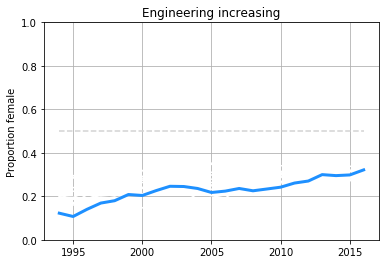

In [3]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 'Engineering increasing',
                      peer_color='white', 
                      highlight_color='dodgerblue')

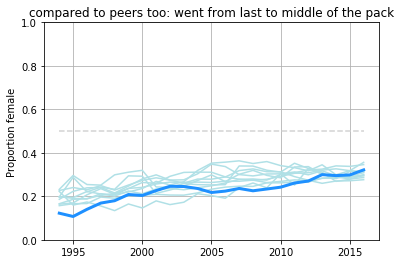

In [4]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 'compared to peers too: went from last to middle of the pack',
                      peer_color='powderblue', 
                      highlight_color='dodgerblue')

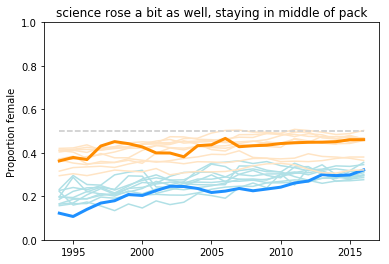

In [5]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, '', peer_color='powderblue', highlight_color='dodgerblue')
plot_peer_proportions(ax, S_TOTALS, 'science rose a bit as well, staying in middle of pack',
                      peer_color='bisque', highlight_color='darkorange')

Text(0.5, 1.0, 'But each field has its own story.')

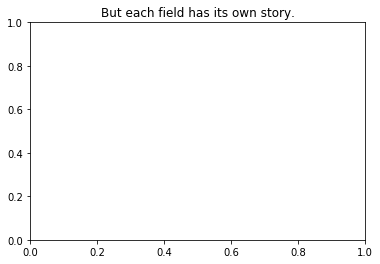

In [6]:
_, ax = plt.subplots()
ax.set_title('But each field has its own story.')

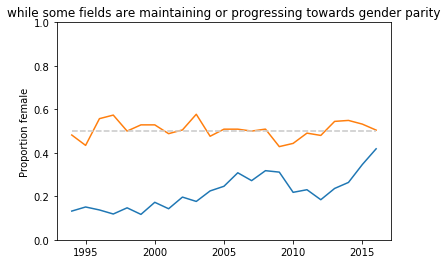

In [7]:
_, ax = plt.subplots()
plot_proportions(ax, 'Science', 'Mathematics and applied mathematics', '')
plot_proportions(ax, 'Science', 'Biology', 
                 'while some fields are maintaining or progressing towards gender parity')

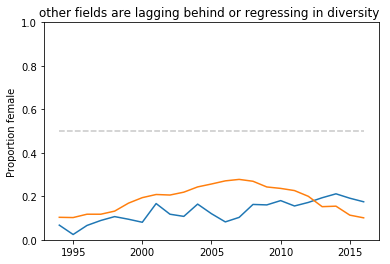

In [8]:
_, ax = plt.subplots()
# plot_proportions(ax, 'Science', 'Mathematics and applied mathematics', '')
# plot_proportions(ax, 'Science', 'Biology', '')
plot_proportions(ax, 'Engineering', 'Mechanical engineering', '')
plot_proportions(ax, 'Science', 'Physics', 
                 'other fields are lagging behind or regressing in diversity ')

## Nutgraf

Overall, though gender diversity within the student body has increased, there are certain fields that have been "left behind", according to an Eye analysis.

Broader trends, pipeline programs, Advancement of Women.

## A closer look: Engineering

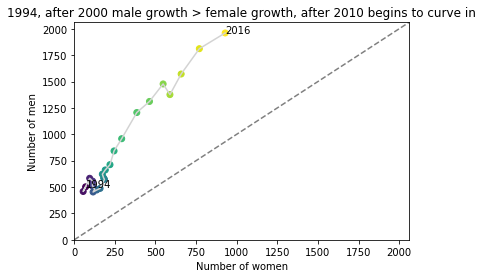

In [9]:
_, ax = plt.subplots()
plot_total_connected(ax, E_TOTALS, '1994, after 2000 male growth > female growth, after 2010 begins to curve in')

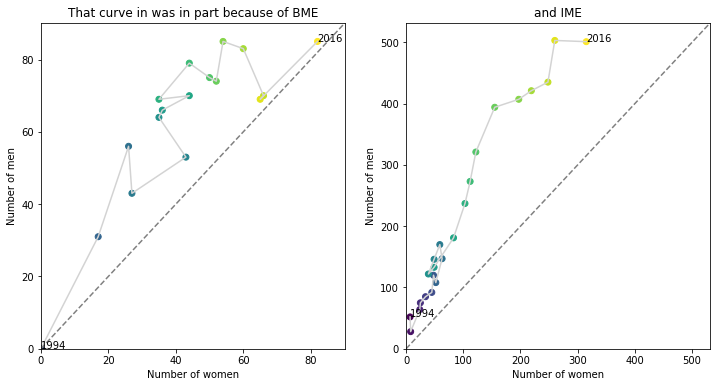

In [10]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_connected(ax[0], 'Engineering', 'Biomedical engineering', 'That curve in was in part because of BME')
plot_connected(ax[1], 'Engineering', 'Industrial and manufacturing engineering', 'and IME')

Both fields nearing parity, etc.

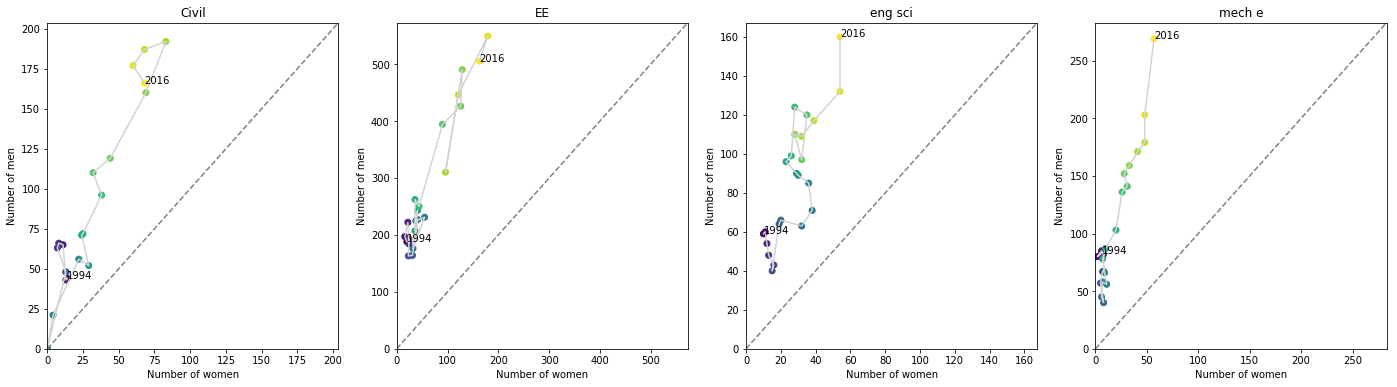

In [11]:
_, ax = plt.subplots(1, 4, figsize=(24, 6))
plot_connected(ax[0], 'Engineering', 'Civil engineering', 'Civil')
plot_connected(ax[1], 'Engineering', 'Electrical engineering', 'EE')
plot_connected(ax[2], 'Engineering', 'Engineering science, mechanics, and physics', 'eng sci')
plot_connected(ax[3], 'Engineering', 'Mechanical engineering', 'mech e')

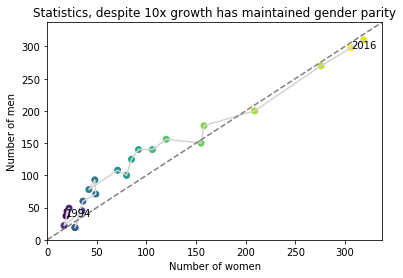

In [39]:
_, ax = plt.subplots()
plot_connected(ax, 'Science', 'Statistics', 'Statistics, despite 10x growth has maintained gender parity')

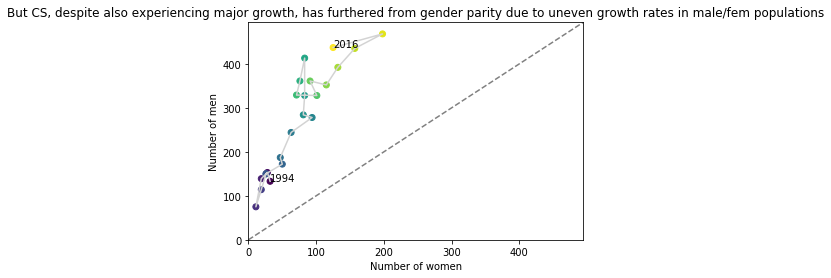

In [59]:
_, ax = plt.subplots()
plot_connected(ax, 'Science', 'Computer sciences', 
               'But CS, despite also experiencing major growth, has furthered from gender parity due to uneven growth rates in male/fem populations')

## Body

### In male-dominated engineering fields, disparate rates of population growth

In [85]:
def plots_eng_field(field):
    _, ax = plt.subplots(1, 3, figsize=(18, 6))
    plot_proportions(ax[0], 'Engineering', field, field)
    plot_counts(ax[1], 'Engineering', field, field)
    plot_connected(ax[2], 'Engineering', field, field)

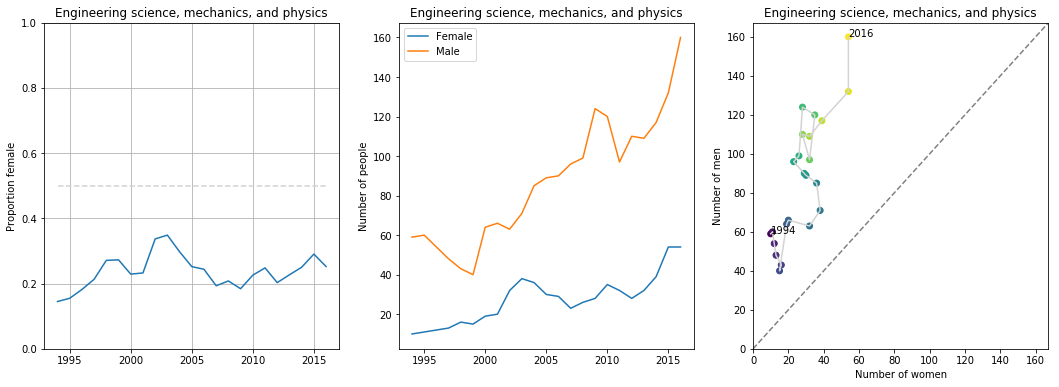

In [87]:
plots_eng_field('Engineering science, mechanics, and physics')

## Something happened to Physics after 2005

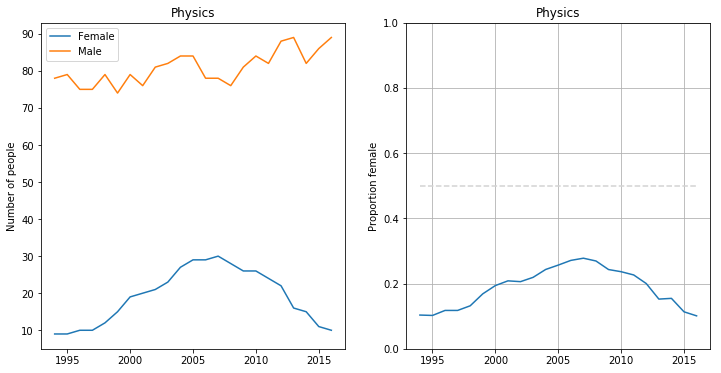

In [61]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_counts(ax[0], 'Science', 'Physics', 'Physics')
plot_proportions(ax[1], 'Science', 'Physics', 'Physics')

In [116]:
selected_fields = {
    'Engineering': fields['Engineering'],
    'Science': ['Mathematics and applied mathematics', 'Biology', 'Physics'],
}

data = {
    'DISCIPLINE_PROPORTIONS': {
        'Science': {inst: get_total_proportions(S_TOTALS, inst) for inst in institutions},
        'Engineering': {inst: get_total_proportions(E_TOTALS, inst) for inst in institutions},
    },
    'DISCIPLINE_COUNTS': {
        'Science': get_total_counts(S_TOTALS, separate=False),
        'Engineering': get_total_counts(E_TOTALS, separate=False)
    },
    'FIELD_PROPORTIONS': { inst: {} for inst in institutions },
    'FIELD_COUNTS': {},
}

for discipline, fields in selected_fields.items():
    for field in fields:
        data['FIELD_COUNTS'][field] = get_counts(discipline, field)
        for inst in institutions:
            data['FIELD_PROPORTIONS'][inst][field] = get_proportions(discipline, field, inst)
    
# sickeningly custom file path for convenience
with open('../../graduate-diversity/src/data.js', 'w') as out:
    json_str = json.dumps(data)
    out.write(f'export default {json_str};');